#### [HOME](../README.md) | [NEXT](1.raw_course_specification.ipynb)

---

# OOP Logistic Regression Implementation

This Jupyter Notebook provides a basic implementation of Logistic Regression for categorisation. The data set contains measurements on a single species of insect captured on two continents. We want to predict an insects continent given the other measurements we have.

#### Step 1 - Import Dependencies

In [22]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.linear_model import LogisticRegression

#### Step 2 - Import Data

In [23]:
insects = pd.read_csv('./data/insects.csv', sep='\t')
insects.head()

,continent,latitude,wingsize,sex
0,1,35.5,901,0
1,1,37.0,896,0
2,1,38.6,906,0
3,1,40.7,907,0
4,1,40.9,898,0


#### Step 3: Instantiate a LogisticRegression Object

In [24]:
insects_regression = LogisticRegression()

#### Step 4: Fit the model

In [25]:
X_insects = insects[['wingsize', 'latitude', 'sex']]
# The response is already encoded as 0's, and 1's.
y_insects = insects['continent']
insects_regression.fit(X_insects, y_insects)

LogisticRegression()

Now that the regression has been fit, we can use the `predict` method to forecast whether our model thinks a family will switch wells.

In [26]:
insects_predictions = insects_regression.predict(X_insects)
print(insects_predictions[:10])

[1 1 1 1 1 1 1 0 0 0]


Additionally (and in many cases more usefully), the `LogisticRegression` has a `predict_proba` method that produces a predicted **probability** that a family will switch well.

In [27]:
insects_probabilities = insects_regression.predict_proba(X_insects)
print(insects_probabilities[:10])

[[0.30132363 0.69867637]
 [0.32236397 0.67763603]
 [0.36324347 0.63675653]
 [0.40520219 0.59479781]
 [0.39828686 0.60171314]
 [0.42200828 0.57799172]
 [0.49985551 0.50014449]
 [0.53924064 0.46075936]
 [0.59430568 0.40569432]
 [0.61036584 0.38963416]]


We can use the `predict_proba` method to plot the actual data, along with the predicted probabilities that a family will switch.

Text(0, 0.5, 'Probability Continent')

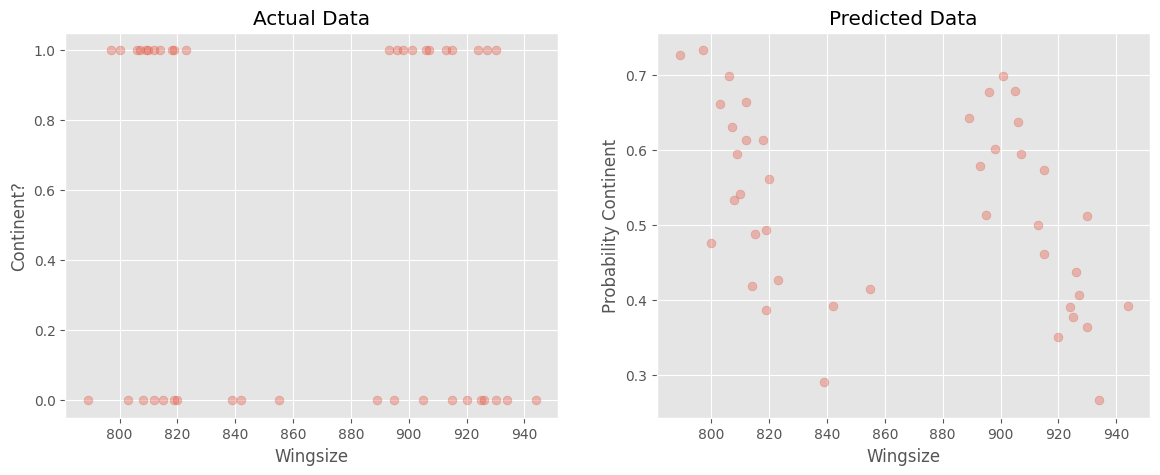

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].scatter(insects.wingsize, insects.continent, s=40, alpha=0.33)
axs[0].set_title("Actual Data")
axs[0].set_xlabel("Wingsize")
axs[0].set_ylabel("Continent")


axs[1].scatter(insects.wingsize, insects_probabilities[:, 1], s=40, alpha=0.33)
axs[1].set_title("Predicted Data")
axs[1].set_xlabel("Wingsize")
axs[1].set_ylabel("Probability Continent")

#### Step 6: Evaluate The Model

In [45]:
table = pd.DataFrame({
    'Target': y_insects,
    'Predicted result': insects_probabilities[:, 1],
    'Loss': y_insects - insects_regression.predict(X_insects).round(2)
})
table["Predicted result"] = table["Predicted result"].round(0)
table["Loss"] = table["Loss"].abs()
print(f"The model predicted incorrectly {table['Loss'].sum()} times out of {table.shape[0]} predictions")
print(table)
cost = table['Loss'].sum() / table.shape[0]
print(f"The cost or average loss of this model is {cost}")


The model predicted incorrectly 18 times out of 42 predictions
    Target  Predicted result  Loss
0        1               1.0     0
1        1               1.0     0
2        1               1.0     0
3        1               1.0     0
4        1               1.0     0
5        1               1.0     0
6        1               1.0     0
7        1               0.0     1
8        1               0.0     1
9        1               0.0     1
10       1               0.0     1
11       0               1.0     1
12       0               1.0     1
13       0               1.0     1
14       0               1.0     1
15       0               1.0     1
16       0               0.0     0
17       0               0.0     0
18       0               0.0     0
19       0               0.0     0
20       0               0.0     0
21       1               1.0     0
22       1               1.0     0
23       1               1.0     0
24       1               1.0     0
25       1               1.